In [99]:
# This project does some text mining, and run some sentiment analysis tools. The LDA workflow is used last, it is a very powerful tool
# A simple Amazon set of files related to Magazine subscriptions is used in order to go through the entire process within a limited time
# The original project was related to the Amazon Sports and Equipments. The data would take more than 30 min to load

In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [76]:
!pip install nltk

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline


In [78]:
# Takes 10 min to download all the packages the first time
#nltk.download()

In [79]:
data_path = '../data/meta_Magazine_Subscriptions.jsonl'
reviews = pd.read_json(data_path, lines=True)


In [80]:
print("Shape: ", reviews.shape)
reviews.head(5)

Shape:  (3391, 16)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Magazine Subscriptions,GQ Print Access Print Magazine,3.6,10,[],"[Product Description, Dive into, GQ, ’s cultur...",None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Conde Nast Publications,[],"{'Date First Available': 'June 2, 2020', 'Manu...",B00FA7T630,NaN,NaN,NaN
1,Magazine Subscriptions,Hi-Fi + Print Magazine,4.4,44,[],[Hi-Fi+ is Europe's premier English-language h...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Absolute Media Ltd/Hi-Fi+,"[Magazine Subscriptions, Arts, Music & Photogr...","{'Date First Available': 'September 19, 2013',...",B00F8P62PO,NaN,NaN,NaN
2,Magazine Subscriptions,Paper Crafts,3.0,3,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],"{'Date First Available': 'May 12, 2021'}",B003F1W9T6,NaN,NaN,NaN
3,Magazine Subscriptions,Horse Illustrated,4.5,284,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Eg Media Investments Llc,"[Magazine Subscriptions, Sports, Recreation & ...",{'Package Dimensions': '10.79 x 8.11 x 0.31 in...,B00007AXX1,NaN,NaN,NaN
4,Magazine Subscriptions,Motorcyclist,3.0,10,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,"[Magazine Subscriptions, Professional & Educat...","{'Date First Available': 'April 30, 2015'}",B00007AZS2,NaN,NaN,NaN


In [81]:
data_path = '../data/Magazine_Subscriptions.jsonl'
reviews = pd.read_json(data_path, lines=True)


In [82]:
print("Shape: ", reviews.shape)
reviews.head(5)

Shape:  (71497, 10)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Great pictures and recipes,Wonderful recipes in this magazine.,[],B00HLSSQKK,B00HLSSQKK,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,2020-12-15 15:29:02.433,0,True
1,4,great for kids who love sports!,Great sports magazine that's on my 9 year olds...,[],B002PXW04Y,B002PXW04Y,AHORTSSMI6ZZFUFWMPT4UFR2ISUQ,2016-08-12 03:28:32.000,1,True
2,5,A great look at what's new on the kosher scene...,"""Joy of Kosher"" magazine fills a much-needed n...",[],B00HCR5090,B00HCR5090,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2014-04-06 23:32:53.000,4,False
3,5,"If you enjoy reading an eye-catching, easy-to-...",I've been addicted to Martha Stewart's Everyda...,[],B0000ARXXS,B0000ARXXS,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2007-06-15 04:04:15.000,4,False
4,1,Too many “ gear ads” !!,Too many ads!,[],B0025ZOVEO,B0025ZOVEO,AFUB7CHTXRPD447QVQCHBZVN2IPQ,2020-06-01 21:24:40.246,13,True


## Keeping meaningful columns for the reviews

In [83]:
# Drop unnecessary columns
cols_to_keep = ['rating', 'title']
reviews = reviews.loc[:,cols_to_keep]
# Take a sample of 20,000 5-star reviews (since they are majority)
five_star_sample = reviews.loc[reviews['rating'] == 5,:].sample(20000, random_state=24)
# Grab the ~19,000+ reviews of 1 and 2 stars
one_and_two_stars = reviews.loc[reviews['rating'].isin([1,2]),:]
# Display first 5 entries 5-star and low-star corpora
five_star_corpus = list(five_star_sample['title'])
low_star_corpus = list(one_and_two_stars['title'])
print(five_star_corpus[:5], "\n\n")
print(low_star_corpus[:5])


['Five Stars', 'Five Stars', 'Not just pretty pictures.', 'Idaho, My Home Sweet Home', 'Great gift'] 


['Too many “ gear ads” !!', 'Not for me', 'No Thanks', 'No Thanks', 'Some Decent Content, but drowned out in Advertisements']


## * Counting Positive/Negative Words<br>
## * count_pos_and_neg() functionalizes the counting of positive and negative words<br>
## * count_pos_and_neg() displays the cross-over<br>

In [84]:
def get_words(file):
    import requests
    f = open(file, 'r', encoding = "ISO-8859-1")
    lines = [l for l in f.readlines() if (l[0] != ";") and l[0:2] != "\n"]
    word_list = [w.replace("\n","") for w in lines]
    return word_list
p_url = '../data/positive-words.txt'
n_url = '../data/negative-words.txt'
positive_words = get_words(p_url)
negative_words = get_words(n_url)

def count_pos_and_neg(text, positive = positive_words, negative = negative_words):
    pos = 0
    neg = 0
    words = nltk.word_tokenize(text)
    for word in words:
        if word in positive: pos +=1
        if word in negative: neg +=1
    return pos, neg, len(words)

def proportion_pos_neg(pos, neg, total):
    print("Positive: {:.2f}%\t Negative: {:.2f}%".format(pos/total*100, neg/total*100))



In [85]:
print(positive_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [86]:
print("Counting on positive words:" , count_pos_and_neg(" ".join(positive_words)))
print("Counting on negative words:" , count_pos_and_neg(" ".join(negative_words)))
print("Overlapping words: ", [w for w in positive_words if w in negative_words])

Counting on positive words: (2006, 3, 2006)
Counting on negative words: (3, 4777, 4797)
Overlapping words:  ['envious', 'enviously', 'enviousness']


In [87]:
### Example of using `proportion_pos_neg`
proportion_pos_neg(4,2,46)

Positive: 8.70%	 Negative: 4.35%


In [88]:
# Below is an example of counting the positive / negative words in a few of the reviews:
print("Counting in a five-star review:", count_pos_and_neg(five_star_corpus[100]))
print("Proportions in a five-star review:")
proportion_pos_neg(*count_pos_and_neg(five_star_corpus[100]))
print("\nCounting in a one/two-star review:", count_pos_and_neg(low_star_corpus[100]))
print("Proportions in a one/two-star review:")
proportion_pos_neg(*count_pos_and_neg(low_star_corpus[100]))


Counting in a five-star review: (0, 0, 3)
Proportions in a five-star review:
Positive: 0.00%	 Negative: 0.00%

Counting in a one/two-star review: (1, 0, 10)
Proportions in a one/two-star review:
Positive: 10.00%	 Negative: 0.00%


In [89]:
print("Low-Star\n", low_star_corpus[100])
print("\n\nHigh-Star\n", five_star_corpus[100])


Low-Star
 Once the gold standard. Now - just below average


High-Star
 Love it!


# Sentiment Intensity
SentimentIntensityAnalyzer will be imported from nltk.sentiment. After that import, the functioning uses the Vader Sentiment metrics.

In [90]:
# Import and instantiate a SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
print("High-star: ", sia.polarity_scores(five_star_corpus[100]))
print("Low-star: ", sia.polarity_scores(low_star_corpus[100]))

High-star:  {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}
Low-star:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [91]:
text = low_star_corpus[30]
compound = sia.polarity_scores(text)["compound"]
compound


0.0

In [92]:
text = low_star_corpus[30]
neg = sia.polarity_scores(text)["neg"]
neg


0.0

# Text mining using LDA

## **Text mining** extracts meaningful information from a large amount of unstructured text data<br>One of the techniques used in text mining is topic modeling, which is used to discover the hidden thematic structure in a collection of documents

## **Latent Dirichlet Allocation (LDA)** is a popular method used in topic modeling<br>It’s a three-level hierarchical generative model that uses statistical correlations between words in many documents to find and quantify the underlying subjects

## **Workflow**

**Bag of Words**: LDA treats each document as a bag of words, which means it ignores the order of words and focuses on the frequency of each word in the document<br>
**Term Frequency-Inverse Document Frequency (TF-IDF)**: LDA builds upon the concept of TF-IDF, which is a statistical measure used to evaluate the importance of a word in the context of a corpus of documents<br>
**Topic Distribution**: LDA assumes that each document is a mixture of a small number of topics and that each word’s creation is attributable to one of the document’s topics<br>
**Co-occurrence of Words**: LDA groups commonly co-occurring words into sets of topics. Each topic is modeled as a probability distribution across a vocabulary of words<br>
**Document Representation**: Each document in the collection is then represented in terms of those topics<br><br>
In essence, LDA attempts to map all the documents and the words within them to a set of hidden topics so that the words in each document are mostly captured by those imagined topics<br>It’s a powerful tool for the automatic organization, understanding, searching, and summarization of large bodies of text

In [93]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [94]:
sentences = nltk.sent_tokenize(" ".join(low_star_corpus))
texts = [[word for word in sentence.lower().split()
if word not in STOPWORDS and word.isalnum()]
for sentence in sentences]
len(texts)
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence


4137

In [95]:
 %%time
num_topics = 4 #The number of topics that should be generated
passes = 6
lda = LdaModel(corpus,
id2word=dictionary,
num_topics=num_topics,
passes=passes)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=3))


[   (0, '0.054*"magazine" + 0.038*"star" + 0.017*"money"'),
    (1, '0.042*"received" + 0.040*"magazine" + 0.025*"subscription"'),
    (2, '0.019*"ads" + 0.015*"disappointed" + 0.013*"order"'),
    (3, '0.054*"magazine" + 0.029*"star" + 0.023*"issue"')]
CPU times: total: 1.48 s
Wall time: 3.95 s


In [96]:
%%time
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df_low = pd.DataFrame(low_star_corpus, columns= ['text'])
df_low['type'] = 'low'
df_5 = pd.DataFrame(five_star_corpus, columns = ['text'])
df_5['type'] = 'high'
df = pd.concat([df_low, df_5])
df['tuple'] = df['text'].apply(lambda x: count_pos_and_neg(x))
df['pos'] = df['tuple'].apply(lambda x: x[0])
df['neg'] = df['tuple'].apply(lambda x: x[1])
df['total'] = df['tuple'].apply(lambda x: x[2])
df['pos_prop'] = df['pos'] / df['total']
df['neg_prop'] = df['neg'] / df['total']
df['dict'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['sia_compound'] = df['dict'].apply(lambda x: x['compound'])
df['sia_neg'] = df['dict'].apply(lambda x: x['neg'])
df['sia_neu'] = df['dict'].apply(lambda x: x['neu'])
df['sia_pos'] = df['dict'].apply(lambda x: x['pos'])
df = df.drop(["tuple", "dict"], axis = 1)

CPU times: total: 9.27 s
Wall time: 17.3 s


# Distribution of Sentiment Scores: Low-Star Reviews


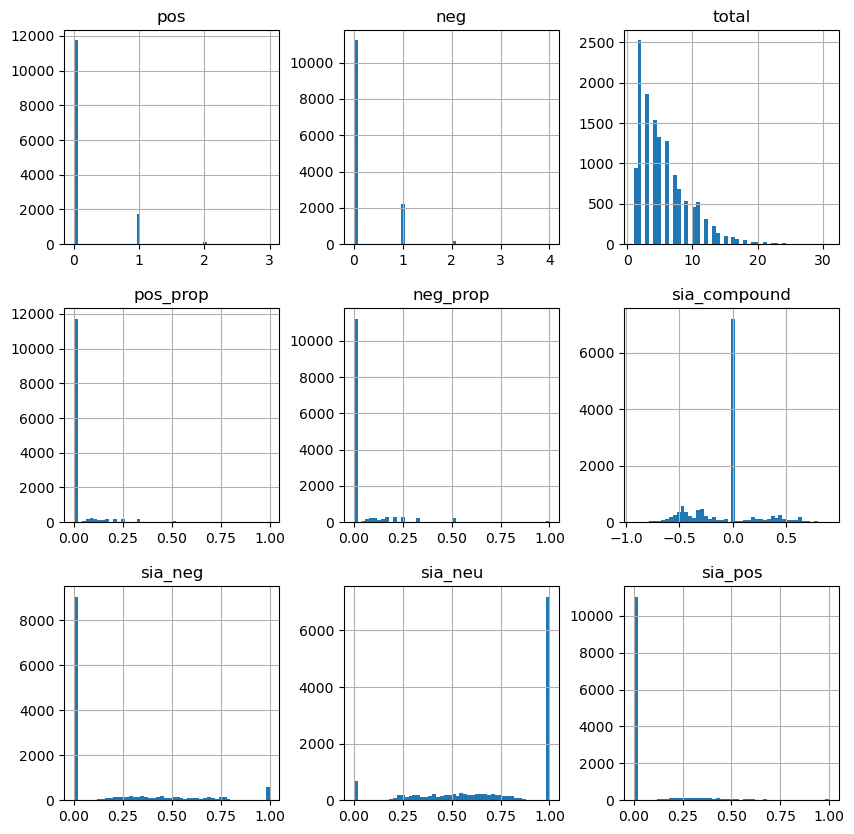

In [97]:
df[df.type == "low"].hist(bins = 50, figsize = (10,10));

# Distribution of Sentiment Scores: High-Star Reviews

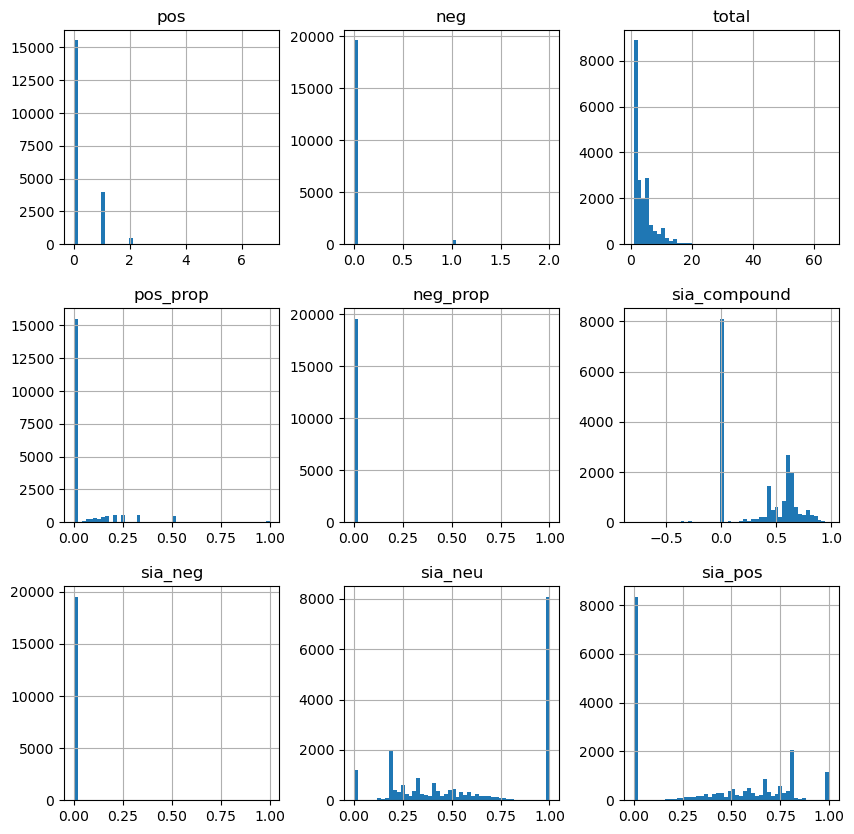

In [98]:
df[df.type =="high"].hist(bins = 50, figsize = (10,10));